#Assignent 3: From idea to scientific result

#Idea
###  - Subscriber type users have longer trip duration than Customer type users.
#Null Hypothesis
###  - Subscriber type users have statistically significant less or the same tripduration 
#Significance level α=0.05
###  - which means i want the probability of getting a result at least as significant as mine to be less then 5%

In [1]:
from __future__ import  print_function
import pylab as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

import os
import json
#import sys
#import urllib2

Populating the interactive namespace from numpy and matplotlib


#Loading Citibike data (2015-03)

In [2]:
df=pd.read_csv('201503-citibike-tripdata.csv')

In [3]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,669,3/1/2015 0:00,3/1/2015 0:11,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,21409,Subscriber,1987,1
1,750,3/1/2015 0:01,3/1/2015 0:14,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,19397,Subscriber,1968,1
2,663,3/1/2015 0:01,3/1/2015 0:12,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,20998,Customer,NaN,0
3,480,3/1/2015 0:02,3/1/2015 0:10,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,21565,Subscriber,1983,1
4,1258,3/1/2015 0:02,3/1/2015 0:23,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,14693,Subscriber,1970,1


#Data summary

In [4]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,341826.000000,341826.000000,341826.000000,341826.000000,341826.000000,341826.000000,341826.000000,341826.000000,328973.000000,341826.000000
mean,734.316673,436.396251,40.735679,-73.990204,436.697931,40.735458,-73.990486,18057.970190,1975.293744,1.146586
std,3049.407740,319.821679,0.018991,0.011825,320.987481,0.018942,0.011870,2085.432954,11.711420,0.448086
min,60.000000,72.000000,40.646768,-74.017134,72.000000,40.646768,-74.017134,14529.000000,1899.000000,0.000000
25%,352.000000,307.000000,40.722438,-73.998512,307.000000,40.722293,-73.999154,16287.000000,1967.000000,1.000000
50%,538.000000,415.000000,40.737815,-73.990093,412.000000,40.737262,-73.990617,18031.000000,1977.000000,1.000000
75%,841.000000,490.000000,40.750664,-73.981854,490.000000,40.750200,-73.981918,19821.000000,1985.000000,1.000000
max,1007614.000000,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21760.000000,1999.000000,2.000000


## Graph of the number of user (by user types)

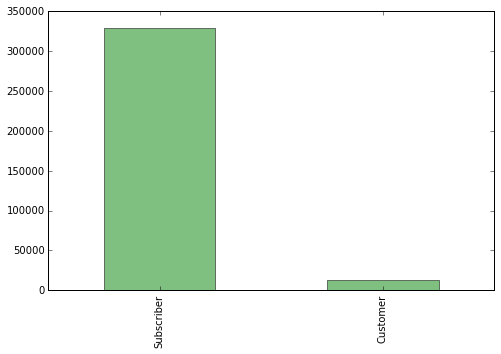

In [5]:
fig=pl.figure(figsize(8,5))

bikes = df['usertype'].value_counts()
bikes.plot(kind='bar', alpha=0.5, color='green')

# Plotting tripduration of each users by user types (Subscriber vs Customer)

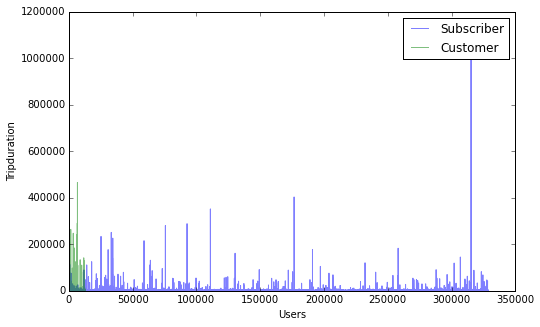

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df['tripduration'][df['usertype']=='Subscriber'], label='Subscriber', alpha=0.5)
ax.plot(df['tripduration'][df['usertype']=='Customer'], label='Customer', alpha=0.5)
ax.set_ylabel('Tripduration')
ax.set_xlabel('Users')
ax.legend()

#Splitting data Subscriber vs Customer

In [7]:
df_tripduration_subscriber=df['tripduration'][df['usertype']=='Subscriber']

In [8]:
df_tripduration_customer=df['tripduration'][df['usertype']=='Customer']

#Data summary of each user type's trip duration

In [9]:
df_tripduration_subscriber.describe()

count     328975.000000
mean         691.830404
std         2681.666944
min           60.000000
25%          347.000000
50%          527.000000
75%          811.000000
max      1007614.000000
Name: tripduration, dtype: float64

In [10]:
df_tripduration_customer.describe()

count     12851.000000
mean       1821.930122
std        7875.657380
min          60.000000
25%         734.000000
50%        1178.000000
75%        1685.000000
max      465749.000000
Name: tripduration, dtype: float64

#Box plot of trip duration by user types

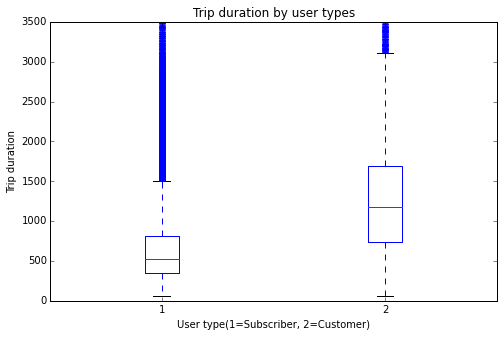

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.boxplot([df_tripduration_subscriber, df_tripduration_customer])
ax.set_ylim(0,3500)
ax.set_title('Trip duration by user types')
ax.set_xlabel('User type(1=Subscriber, 2=Customer)')
ax.set_ylabel('Trip duration')
plt.show()

#Hypothesis testing (Z-test)

In [12]:
P1=df['tripduration'][df['usertype']=='Subscriber'].mean()
N1=df['tripduration'][df['usertype']=='Subscriber'].count()

In [13]:
print (N1)

328975


In [14]:
print (P1)

691.830403526


In [15]:
P0=df['tripduration'][df['usertype']=='Customer'].mean()
N0=df['tripduration'][df['usertype']=='Customer'].count()

In [16]:
print (N0)

12851


In [17]:
print (P0)

1821.93012217


In [18]:
Nt_0=P0*N0
Nt_1=P1*N1

In [19]:
print (Nt_0)

23413624.0


In [20]:
print (Nt_1)

227594907.0


In [21]:
sp=(P0*N0+P1*N1)/(N1+N0)
print (sp)

734.31667281


In [22]:
sp_stdev= lambda p, n: np.sqrt( p * ( 1 - p ) /n[0] +  p * ( 1 - p )/n[1]  )
sp_stdev_2y= 3049.407

print (P0, N0, N1, sp_stdev_2y)

1821.93012217 12851 328975 3049.407


In [23]:
zscore = lambda P0, P1, s : (P0-P1)/s
z_2y = zscore(P1, P0, sp_stdev_2y)
print (z_2y)

-0.370596551606


In [31]:
alpha=0.05
p_2y=1-0.6443
def report_result(p,a):
    print ('is the p value {0:.2f} smaller than the critical value {1:.2f}? '.format(p,a))
    if p<a:
        print ("YES!")
    else: print ("NO!")
    
    print ('the Null hypothesis is {}'.format( 'rejected' if p<a  else 'not rejected'))

In [32]:
report_result(p_2y,alpha)

is the p value 0.36 smaller than the critical value 0.05? 
NO!
the Null hypothesis is not rejected


#To sum it up    
                                           
    The starting assumption of this research was that local people, ("subscribers")that are using citi-bike services at a daily basis are more likely to take longer trips as they are usually commuting, while non- permanent users ("customers") are using the bikes as a touristic attraction.
    
    Our test results shows that the null hypothesis is NOT rejected, therefore we can't assume that the trip duration is longer for locals than it is for tourists. By looking closer at the statistics we can realize that the subscribers and customer 'trip duration' means are leaning toward not rejecting as the "customers"  mean is 1821.93 and the "subscribers" mean is 691.83
 
     After analyzing the data and seeing that tourists are actually more likely to take the longer drives we should try to re evaluate our assumptions. It is possible that tourists are less accustomed to rides in the city and therefor it takes them longer to get used to the bike lanes and understand how to get from one point to another while the locals are well trained and used to getting to their destination. 

    Another possible explanation could be that we misunderstood the behavior model for "costumers". Perhaps most of the rides are after work hours and are used to get to short distance destinations such as grocery shopping etc. Meaning that for the long distance drives (e.g. commuting) people prefer to use other transportation methods such as subway or Uber. 

    Further research should try and evaluate the type of rides for each group. This can be tested with examining the hours of the "subscribers" group.